## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vishal\AppData\Roaming\Python\Python37\s

In [14]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/vishal/Desktop/Project of Real Time/17. Car Brand/Deep-Learning-Car-Brand-master/Datasets/Datasets/train/'
valid_path = 'C:/Users/vishal/Desktop/Project of Real Time/17. Car Brand/Deep-Learning-Car-Brand-master/Datasets/Datasets/test'


In [15]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [16]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [17]:
# useful for getting number of output classes
folders = glob('C:/Users/vishal/Desktop/Project of Real Time/17. Car Brand/Deep-Learning-Car-Brand-master/Datasets/Datasets/train/*')

In [18]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [19]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [20]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [22]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/vishal/Desktop/Project of Real Time/17. Car Brand/Deep-Learning-Car-Brand-master/Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [27]:
test_set = test_datagen.flow_from_directory('C:/Users/vishal/Desktop/Project of Real Time/17. Car Brand/Deep-Learning-Car-Brand-master/Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 48s 24s/step - loss: 3.9578 - acc: 0.7969 - val_loss: 18.0287 - val_acc: 0.3276
Epoch 2/50
2/2 [==============================] - 43s 21s/step - loss: 1.6024 - acc: 0.8750 - val_loss: 17.8720 - val_acc: 0.3276
Epoch 3/50
2/2 [==============================] - 42s 21s/step - loss: 0.5692 - acc: 0.9375 - val_loss: 18.1067 - val_acc: 0.3276
Epoch 4/50
2/2 [==============================] - 42s 21s/step - loss: 0.3127 - acc: 0.9688 - val_loss: 18.6976 - val_acc: 0.3276
Epoch 5/50
2/2 [==============================] - 43s 21s/step - loss: 0.0232 - acc: 0.9844 - val_loss: 19.6468 - val_acc: 0.3276
Epoch 6/50
2/2 [==============================] - 42s 21s/step - loss: 0.7199 - acc: 0.9375 - val_loss: 20.7241 - val_acc: 0.3276
Epoch 7/50
2/2 [==============================] - 42s 21s/step - loss: 0.2507 - acc: 0.9688 - val_loss: 21.6539 - val_acc: 0.3276
Epoch 8/50
2/2 [==============================] - 42s 21s/step - loss: 0.4995 - acc: 0.953

In [47]:
r.history

{'loss': [3.9577544927597046,
  1.6024185419082642,
  0.5692165493965149,
  0.3127383799292147,
  0.023168509562310646,
  0.7198924100375734,
  0.25074782036243803,
  0.499525731196627,
  0.0022110296291657505,
  7.35104622435756e-05,
  0.03897535865507962,
  0.0017930669127963483,
  3.186676650557274e-06,
  0.0,
  5.5879272653491796e-08,
  2.812581669786596e-07,
  0.0,
  0.0,
  0.00020161393331363797,
  1.3224727934968428e-07,
  1.8626450382086546e-09,
  0.0,
  0.0,
  1.043046836013417e-06,
  0.0,
  0.0,
  0.002391759306192398,
  1.031872443491011e-06,
  1.6763799126628953e-08,
  0.0,
  3.017468657162681e-07,
  0.0,
  3.7252898543727042e-09,
  1.3038003956467037e-06,
  6.063771593289857e-06,
  7.450578820566989e-09,
  6.705378723381727e-07,
  6.365226909110788e-06,
  1.5254319123414462e-06,
  1.1175868230850483e-08,
  0.0,
  0.0,
  0.004998793825507164,
  1.8626450382086546e-09,
  2.7939652369468604e-08,
  5.215319447415823e-07,
  2.4939956347225234e-05,
  0.0,
  6.016227871441515e-07

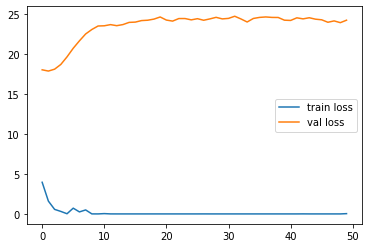

KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [48]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [49]:
pwd

'C:\\Users\\vishal\\Desktop\\Project of Real Time\\17. Car Brand\\Deep-Learning-Car-Brand-master'

In [31]:

y_pred = model.predict(test_set)


In [32]:
y_pred

array([[2.8474137e-12, 2.0648125e-17, 1.0000000e+00],
       [2.7431351e-12, 2.4872213e-17, 1.0000000e+00],
       [5.5916393e-13, 5.2602851e-18, 1.0000000e+00],
       [2.7382267e-12, 1.6155481e-17, 1.0000000e+00],
       [1.5375829e-12, 3.1133497e-17, 1.0000000e+00],
       [5.4002245e-13, 2.0813870e-18, 1.0000000e+00],
       [1.6333555e-12, 1.9234351e-17, 1.0000000e+00],
       [1.3855870e-12, 1.6540932e-17, 1.0000000e+00],
       [3.9323341e-13, 1.2887940e-17, 1.0000000e+00],
       [1.0778213e-11, 8.8985913e-17, 1.0000000e+00],
       [1.9064843e-13, 1.8590092e-17, 1.0000000e+00],
       [3.6469512e-12, 2.5224410e-17, 1.0000000e+00],
       [8.8604184e-13, 2.2796007e-17, 1.0000000e+00],
       [3.7548941e-13, 7.1145457e-18, 1.0000000e+00],
       [1.8269351e-12, 7.3259516e-18, 1.0000000e+00],
       [1.3400936e-12, 1.6553303e-17, 1.0000000e+00],
       [9.3573424e-13, 1.4717535e-17, 1.0000000e+00],
       [2.9695855e-12, 3.8130717e-17, 1.0000000e+00],
       [2.6626796e-13, 6.175

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('model_resnet50.h5')

W0702 14:29:47.307819 25312 deprecation.py:506] From C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0702 14:29:47.310810 25312 deprecation.py:506] From C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0702 14:29:47.314804 25312 deprecation.py:506] From C:\Users\vishal\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\init_ops.py:97: calling Ones.__init__ (from tensorflow.pyth

In [37]:
img_data

NameError: name 'img_data' is not defined

In [39]:
img=image.load_img('C:/Users/vishal/Desktop/Project of Real Time/17. Car Brand/Deep-Learning-Car-Brand-master/Datasets/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [40]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [41]:
x.shape

(224, 224, 3)

In [42]:
x=x/255

In [43]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
model.predict(img_data)

array([[1.8383906e-07, 3.9264875e-13, 9.9999976e-01]], dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data), axis=1)

In [46]:
a==1

array([False])